# Periodogram of EEG Time Series
The following notebook produces a periodogram (estimate of spectral density) of an array representing a time series. The second function produces a cross spectral density estimate, useful for examining cross-correlations between time series in the frequency domain. This is relevant to our data due to its multivriate nature.

In [8]:
# Required package: SciPy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
print("Loaded packages successfully.")

Loaded packages successfully.


## Function 1: Power Spectral Density
The input is a NumPy array ```x```.

In [9]:
def pgram(x):
    freq, density = signal.periodogram(x)
    plt.plot(freq, density)
    plt.ylabel("Power Spectral Density")
    plt.xlabel("Frequency")
    plt.show()

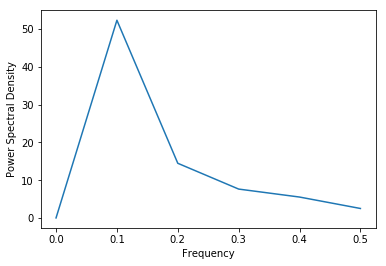

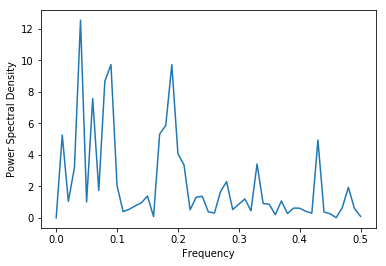

In [10]:
# Test on different inputs.

# Regular Array
z1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
pgram(z1)

# AR(1) Process with phi = 0.5
n = 100
a = np.zeros(n)
a[1] = random.normalvariate(0, 1)
for i in range(1, n):
    a[i] = 0.5*a[i-1] + random.normalvariate(0, 1)
pgram(a)

## Function 2: Cross Spectral Density
The input is two different time series - ```x``` and ```y```.

In [11]:
def cgram(x, y):
    freq, density = signal.csd(x, y)
    plt.plot(freq, density)
    plt.ylabel("Cross Spectral Density")
    plt.xlabel("Frequency")
    plt.show()

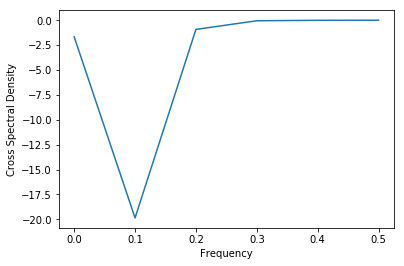

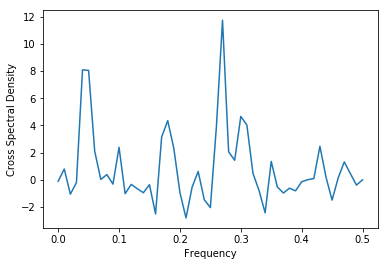

In [12]:
# Test on different inputs

# Regular Arrays
z2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
z3 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
warnings.simplefilter("ignore")
cgram(z2, z3)

# Two AR(1) Processes, with phi = 0.75 and 0.25 respectively.
n = 100
b = np.zeros(n)
c = np.zeros(n)
b[1] = random.normalvariate(0, 1)
c[1] = random.normalvariate(0, 1)
for i in range(1, n):
    b[i] = 0.75*a[i-1] + random.normalvariate(0, 1)
    c[i] = 0.25*a[i-1] + random.normalvariate(0, 1)
cgram(b, c)